<a href="https://colab.research.google.com/github/salimnh/chronic-lymphocytic-leukemia/blob/master/LLC_Detection_Quinten_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

import os
import math
import tensorflow as tf
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10.0, 6.0)

# Load the TensorBoard notebook extension
%load_ext tensorboard

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
path='/content/gdrive/My Drive/raw_data.csv'
df=pd.read_csv(path,sep=";")

# Util Function

In [0]:
def conditions_num(df):
    if df['cell_type']== "B" and df['patient_state'] == "sain":
      return 1
    elif (df['cell_type']== "B") and (df['patient_state'] == "malade"):
      return 2
    else:
      return 3





In [0]:
def conditions_Lasso(sp):
    if sp['var']== True:
      return 1
    else:
      return 0




In [0]:
def get_Lasso_chart(df_lasso):
  sp['varr']=sp.apply(conditions_Lasso, axis=1)
  lasso_res=sp[sp["varr"]==1].sample_index
  lasso_res=lasso_res.to_list()
  wl = np.arange(900,2898,2)  # wavelengths
  len(wl)
  X=df_Lasso.iloc[:,1:]
  with plt.style.context(('ggplot')):
      plt.plot(wl, X.T) #.T- transpose 
      plt.xlabel('Wavelength (nm)')
      plt.ylabel('Intensity')
      plt.title('Relevent Wavelength according to Lasso s penalty')
      for i in range(len(lasso_res)):
        plt.axvline(x=lasso_res[i]+900,c='g')
      plt.show()


# Feature selection using Lasso

### L1 reg

In [0]:

df['cell_type_new']=df.apply(conditions_num, axis=1)

rm=["patient_name","cell_name","cell_type","patient_state","spectre"]
df_Lasso=df.drop(rm,axis=1)


df_Lasso.head()

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,lambda_11,lambda_12,lambda_13,lambda_14,lambda_15,lambda_16,lambda_17,lambda_18,lambda_19,lambda_20,lambda_21,lambda_22,lambda_23,lambda_24,lambda_25,lambda_26,lambda_27,lambda_28,lambda_29,lambda_30,lambda_31,lambda_32,lambda_33,lambda_34,lambda_35,lambda_36,lambda_37,lambda_38,lambda_39,lambda_40,...,lambda_961,lambda_962,lambda_963,lambda_964,lambda_965,lambda_966,lambda_967,lambda_968,lambda_969,lambda_970,lambda_971,lambda_972,lambda_973,lambda_974,lambda_975,lambda_976,lambda_977,lambda_978,lambda_979,lambda_980,lambda_981,lambda_982,lambda_983,lambda_984,lambda_985,lambda_986,lambda_987,lambda_988,lambda_989,lambda_990,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,cell_type_new
0,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,52.119610,56.263689,86.478892,116.868995,150.661177,165.898940,159.089887,146.755421,127.209531,102.595441,104.469531,115.749315,133.997255,138.700018,136.562609,133.546228,136.680717,129.966532,122.467446,142.227358,176.575825,219.010485,265.684521,302.606714,330.305781,319.450726,296.509909,262.012909,233.357286,193.502979,174.324156,170.546015,159.889564,153.804071,...,401.889500,413.499319,410.311414,397.620867,384.091665,359.373099,342.608917,344.524749,351.742449,373.342601,383.116207,385.022144,384.441981,385.024898,384.582244,393.485268,384.724095,379.304430,368.418881,342.756853,328.762072,322.266301,316.672073,316.405262,310.399913,316.573185,325.743670,329.056259,341.811507,344.903100,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,2
1,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,58.639653,67.710887,95.071101,117.132538,143.392143,157.662533,166.280800,153.732768,130.314193,116.854877,118.908270,133.384427,147.076488,154.819421,154.802098,144.519335,123.584568,110.903102,111.749906,137.098571,162.338287,207.021147,258.368987,291.740654,314.030217,305.917293,283.866903,260.144598,231.060658,202.135280,184.251789,165.260339,160.850579,162.966252,...,412.417247,421.937006,415.549786,399.444684,388.675036,370.976439,353.939571,348.910289,341.456346,342.430363,347.397951,351.961375,364.142934,367.520822,366.977647,365.546951,355.727163,355.569104,352.075873,356.053710,344.943866,334.594908,336.202030,337.517429,343.996063,348.120605,339.440934,340.527497,328.286927,326.236135,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2
2,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,61.320470,74.500701,98.858167,119.955467,153.980971,170.602762,164.917903,156.327297,154.188035,140.048131,137.830607,149.904602,160.258888,149.745168,126.446275,114.503012,110.440772,115.616118,122.946291,154.315283,184.876366,217.011947,261.961016,292.138123,315.289722,297.328886,293.361621,264.937213,238.335797,203.190049,193.069939,174.956348,157.866196,138.605070,...,407.593198,396.455840,392.666933,372.411157,373.955056,370.380175,371.332778,366.199264,357.478762,357.338204,365.636408,363.661457,372.058992,375.910003,356.515137,347.292881,346.539977,341.869459,346.527689,344.270617,338.701617,330.122719,330.458938,320.158579,324.647414,322.627576,327.367132,335.327600,332.216428,335.075861,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,2
3,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,53.734999,74.533893,112.334765,133.215160,177.023511,200.483570,197.056404,175.905199,140.754343,134.764428,137.343568,132.479383,145.149593,138.240108,128.621903,118.675626,103.798755,118.773937,142.335722,158.781896,204.466060,249.010600,311.287928,339.925291,348.813698,325.722716,317.131431,259.284536,244.293134,213.126490,209.737553,184.743080,172.904595,155.779325,...,416.622523,415.813108,399.011005,386.462183,388.878957,380.350989,363.805523,360.144798,368.294790,369.159429,371.47557

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    df_Lasso.drop(labels=['cell_type_new'], axis=1),
    df_Lasso['cell_type_new'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((5037, 999), (2160, 999))

In [0]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
sel_ = SelectFromModel(LogisticRegression(C=0.01, penalty='l1',solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)


SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
sp=sel_.get_support()
sp=pd.Series(sp)
sp=sp.to_frame()
sp=sp.rename(columns={0:"var"})

In [0]:
sp['sample_index'] = range(1, len(sp) + 1)


### Lasso result

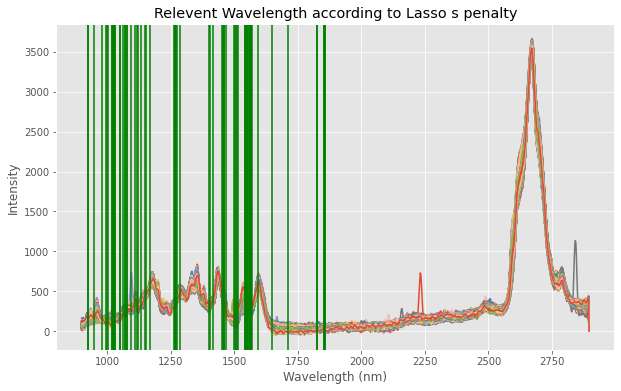

In [0]:
get_Lasso_chart(df_Lasso)

In [0]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 999
selected features: 71


# Random Forest

### Classifier

In [0]:
X=df[selected_feat]
y=df.cell_type_new

In [0]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
# Fitting the classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the test set result
y_pred = model.predict(X_test)


### Random forest reslut

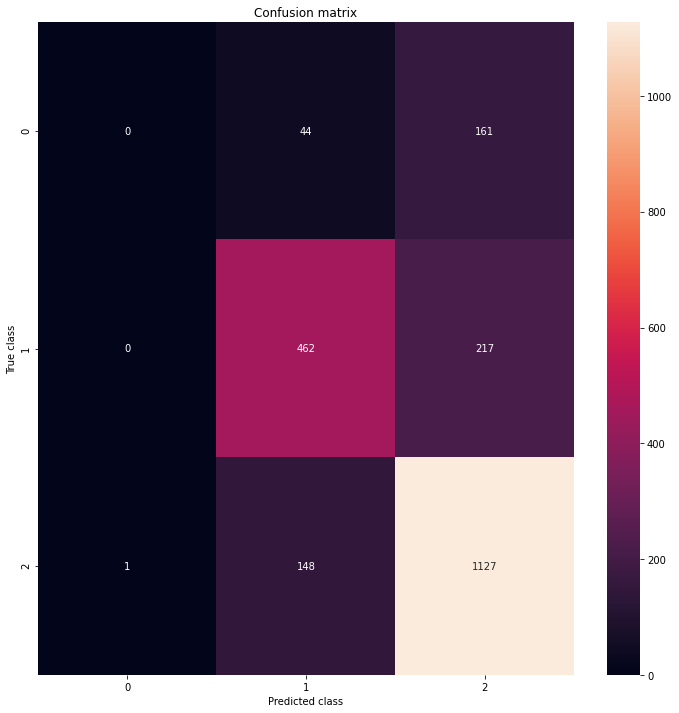

In [0]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cm,  annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [0]:
# Getting the score for our model
model.score(X_test, y_test)

0.7356481481481482